In [2]:
%pip install matplotlib numpy pandas scipy scikit-learn keras tensorflow

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

Note: you may need to restart the kernel to use updated packages.


## Estimation of a Parabolic Function

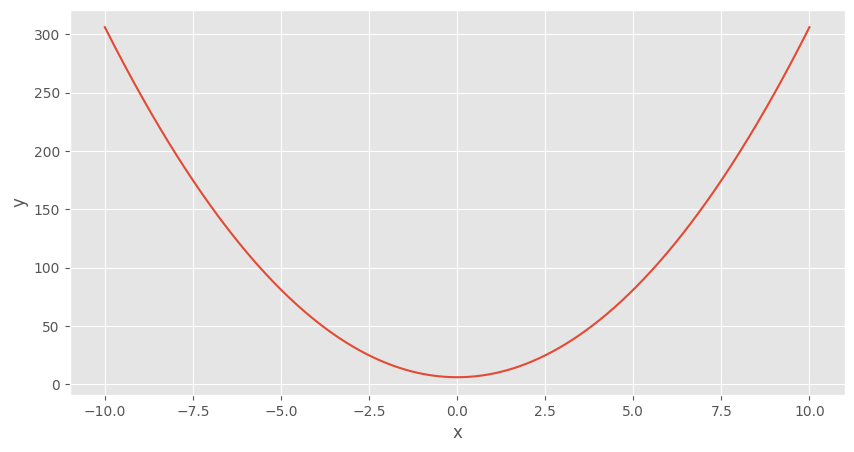

In [3]:
# Here is the function we want to estimate:
# y = 3 * x^2 + 6

def f(x):
    return 3 * x**2 + 6
x = np.arange(-10, 10.01, .01)
y = f(x)


plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We split the dataset between the training and test dataset, with a split of 75% for the training and 25% for the test.

In [4]:
# Build the training and test datasets
X = x
y = y
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=0)


Then we build the ANN with four layers, with 10 neurons each.

In [ ]:
# ANN with four layers, 10 neurons each
# activation function: ReLU

ANN = Sequential()
ANN.add(Dense(10,input_dim = 1, activation = 'relu')) #input layer + first hidden layer

ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))         
ANN.add(Dense(1)) #output layer

/Users/emanuelesaccoliti/VS Code/BS Neural Pricer/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We define the loss function as the mean squared error and minimize it via the Adam algorithm, fitting the model on the training dataset. We use a batch size equal to 16 and 150 epochs here.

In [6]:
# Loss function = MSE, optimizer: Adam
ANN.compile(loss = 'mean_squared_error', optimizer='adam')

# fit the ANN on the training dataset
ANN.fit(X_train, y_train, epochs = 150, batch_size = 16)

Epoch 1/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - loss: 18483.6836  
Epoch 2/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 14907.7158
Epoch 3/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 5161.9775
Epoch 4/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 1697.2988
Epoch 5/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1353.3008
Epoch 6/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1236.1012  
Epoch 7/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1104.5040
Epoch 8/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 973.7017
Epoch 9/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 855.4019
Epoch 10/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 724.0874
Epoch 11/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 591.5741
Epoch 12/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 470.3426
Epoch 13/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 363.4075
Epoch 14/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 270.0847
Epoc

We estimate the values on the test dataset.

In [7]:
# Prediction
y_pred = ANN.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


And we compare the estimations from the model with the real values.

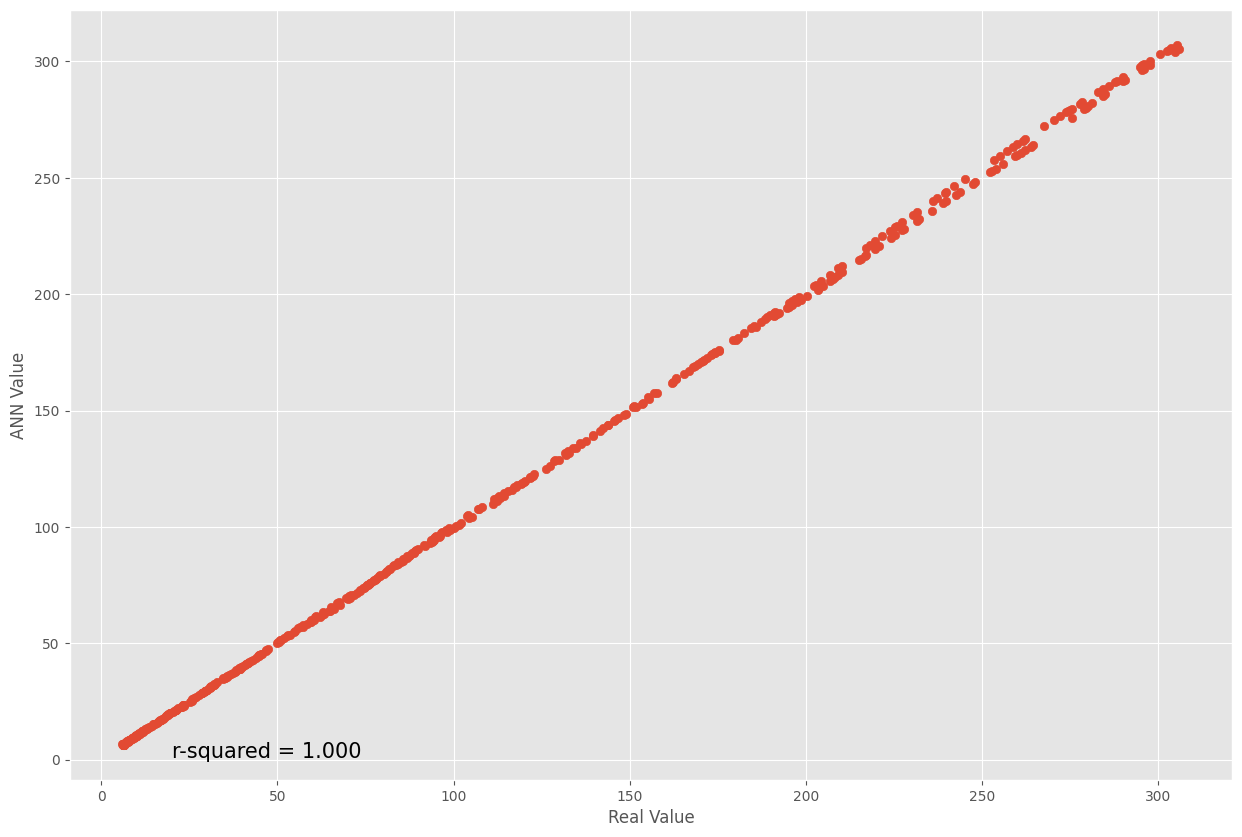

In [8]:
# Comparison real values and predictions on test dataset

plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size = 15)
plt.show();

Here's a scatterplot to represent the relationship between the real values and th estimated ones.

Here’s how to interpret it 👇🏻
* If the neural network were perfect, all the points would lie exactly on the diagonal line $y = x$ because for every observation, the predicted value would be equal to the real value.

* If the points are scattered far from that line, it means the network made larger prediction errors.

## Black & Scholes Neural Pricing

We know the price of a european call option in the Black-Scholes model, it is given by the following closed form solution:
$$C_t = S_t \, N(d_1) - K e^{-r (T - t)} N(d_2)$$



where
$$
\text{with} \quad 
d_2 = \frac{\ln\left(\frac{S_t}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}},
\quad
d_1 = d_2 + \sigma \sqrt{T - t},
\quad
N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{u^2}{2}} \, du
$$



The option price is a function of five variables, the asset price $S$, the strike price $K$, the time to maturity $T-t$, the volatility sigma and the risk free interest rate $r$.

As the option price is linear homogenous in S and K, it can be reduced to four variables, fixing $S = 100$ for example; that is the price of a call for example can be expressed as
$$C_{BS}(100, K, T, \sigma, r).$$
We define the option price of european call and put options in the Black-Scholes framework.

In [ ]:
# BS prices of europan call option and put option
class EuropeanOptionBS:

    def __init__(self, S, K, T, r, q, sigma,Type):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q        
        self.sigma = sigma
        self.Type = Type
        self.d1 = self.d1()
        self.d2 = self.d2()
        self.price = self.price()
        
    def d1(self):
        d1 = (math.log(self.S / self.K) \
                   + (self.r - self.q + .5 * (self.sigma ** 2)) * self.T) \
                    / (self.sigma * self.T ** .5)       
        return d1

    def d2(self):
        d2 = self.d1 - self.sigma * self.T ** .5     
        return d2
    
    def price(self):
        if self.Type == "Call":
            price = self.S * math.exp(-self.q * self.T) * norm.cdf(self.d1) \
            - self.K * math.exp(-self.r *self.T) * norm.cdf(self.d2)
        if self.Type == "Put":
            price = self.K * math.exp(-self.r * self.T) * norm.cdf(-self.d2) \
            - self.S * math.exp(-self.q * self.T) * norm.cdf(-self.d1)            
        return price

The objective is to train the NN to learn the mapping between the input variables $(r, K, \tau, \sigma)$ and the corresponding Black–Scholes price.

* A grid of values is generated for the four input variables $(r, K, \tau, \sigma)$, which will serve as the training inputs for the network.

* The underlying asset price $S$ is fixed at $100$ for all options in the dataset, exploiting the homogeneity property of the Black–Scholes formula.

* For each combination $(r, K, \tau, \sigma)$, the theoretical Black-Scholes price is computed.

* The resulting dataset is stored as a NumPy array, where the first four columns contain the input features $X = (r, K, \tau, \sigma)$ and the fifth column contains the corresponding option price $y = C_{\text{BS}}(S,K,\tau,r,\sigma)$.


In [ ]:
# Generate a dataset of BS prices dataset
r = np.arange(.0, .1, .01) #interest rates
Strike = np.arange(50, 155, 5) #strike price
T = np.arange(0.1, 2.1, 0.1) #time to maturity
sigma = np.arange(0.1, 2.1, .1) #volatility

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                data.append([r_, Strike_, T_, sigma_, \
                             EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price])
data = np.asarray(data)

The dataset is then divided in:
* $X_{\text{train}}, y_{\text{train}}$ (75\%) $\to$ used for the ANN training,

* $X_{\text{test}}, y_{\text{test}}$ (25\%) $\to$ kept separate to evaluate the model's performance on unseen data.

In [ ]:
# Build the training and test datasets
X = data[:,:4] #parameters = r, strike, T, sigma

y = data[:,4:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

We construct and train the ANN to approximate the BS pricing function $C_{BS}(\cdot)$, providing the approximation $$\widehat{C}_{ANN}(\cdot) \approx C_{BS}(\cdot)$$

We use again a neural network with four layers, 10 neurons in each, the input dimension is now 4.

In [11]:
# ANN with four layers, 10 neurons each
# activation function: ReLU

ANN = Sequential()
ANN.add(Dense(10,input_dim = 4, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))         
ANN.add(Dense(1))


/Users/emanuelesaccoliti/VS Code/BS Neural Pricer/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


As before, we define the loss function as the mean squared error and minimize it via the Adam algorithm, fitting the model on the training dataset. We use a batch size equal to 16 and 150 epochs here.

In [12]:
#Loss function = MSE, optimizer: Adam
ANN.compile(loss = 'mean_squared_error', optimizer='adam')

# fit the ANN on the training dataset
ANN.fit(X_train, y_train, epochs = 150, batch_size = 16)

Epoch 1/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 422us/step - loss: 307.7917
Epoch 2/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 430us/step - loss: 49.2564
Epoch 3/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 421us/step - loss: 48.7344
Epoch 4/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 435us/step - loss: 47.7353
Epoch 5/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 419us/step - loss: 32.2389
Epoch 6/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 429us/step - loss: 22.3441
Epoch 7/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 435us/step - loss: 21.8042
Epoch 8/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - loss: 20.8891
Epoch 9/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step - loss: 20.3708
Epoch 10/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 425us/step - loss: 19.9210
Epoch 11/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - loss: 19.4352
Epoch 12/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 435us/step - loss: 18.9302
Epoch 13/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 426us/step - loss: 16.6500
Epoch 14/150
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s

657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


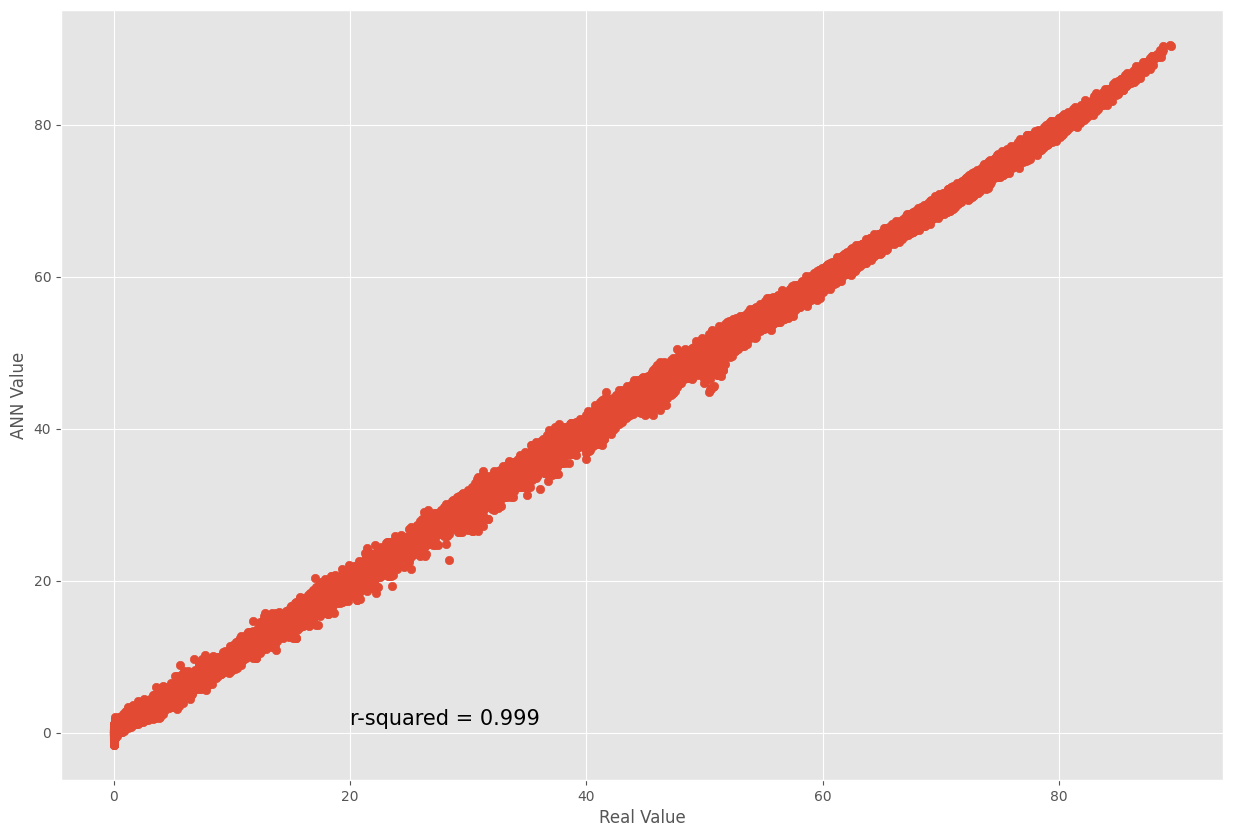

In [14]:
#prediction
y_pred = ANN.predict(X_test)

#Comparison real values and predictions on test dataset
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size = 15)
plt.show();

### Homogeneity Test

The goal is to verify whether the network correctly reproduces the homogeneity of degree one property of option prices with respect to S and K, that is
$$C_{BS}(\lambda S, \lambda K,T,r,\sigma)= \lambda C_{BS}(S,K,T,r,\sigma)$$

This tests whether the NN has learned the structural relationship between S and
K, rather than merely fitting local data patterns.

We compare the price of an option with a strike price at 120, a time to maturity at 6 months (0.5), the risk-free interest rate at 5% and the implied volatility at 30% when changing the asset price.

In [19]:
K = 120
r = 0.05
sigma = 0.3
T = 0.5
S = np.arange(50, 151, 1)

PriceBS = [EuropeanOptionBS(S_, K, T, r, 0, sigma, "Call").price for S_ in S]

PriceANN = [S_ / 100 * \
            ANN.predict(np.array([[r, K / S_ * 100, T, sigma]]))[0][0] for S_ in S]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

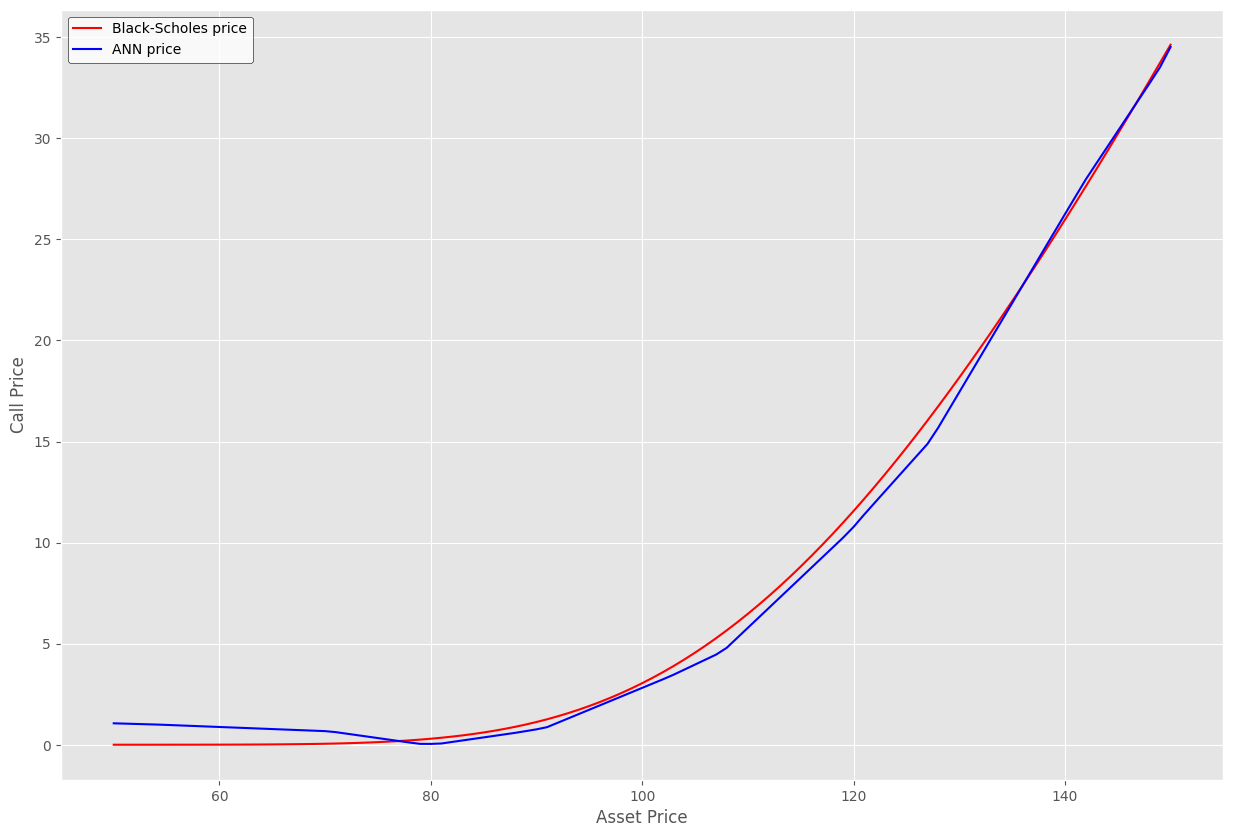

In [27]:
# Comparison BS vs ANN prices
plt.figure(figsize = (15,10))
plt.plot(S, PriceBS, color='red', label = "Black-Scholes price")
plt.plot(S, PriceANN, color='blue', label = "ANN price")
plt.xlabel("Asset Price")
plt.ylabel("Call Price")
plt.legend(loc='best', frameon=True, facecolor='white', edgecolor='black')
plt.show();

It can be seen on the left side of the chart that the model price of the call option increases when the asset price decreases which is a violation of the call spread arbitrage condition.

Indeed, nothing guarantees that the no arbitrage conditions such as the call spread, butterfly spread or calendar spread are not violated when we build the ANN. Therefore,  it may be required additional regularisation techniques or constrains.

### Extrapolation

Now, we re interested in how well the model is able to generalize with different values of the parameters $r$, $K$, $T$, $\sigma$.

In [20]:
# Define extrapolation ranges (wider than training)
r_extra = np.arange(0.1, 0.21, 0.02)       # interest rates beyond 0.09
Strike_extra = np.arange(160, 260, 10)     # strikes beyond 150
T_extra = np.arange(2.5, 4.1, 0.3)         # maturities beyond 2.0
sigma_extra = np.arange(2.2, 3.1, 0.2)     # volatilities beyond 2.0

In [21]:
# Generate new extrapolation data
data_extra = []
for r_ in r_extra:
    for K_ in Strike_extra:
        for T_ in T_extra:
            for sigma_ in sigma_extra:
                price_BS = EuropeanOptionBS(100, K_, T_, r_, 0, sigma_, "Call").price
                data_extra.append([r_, K_, T_, sigma_, price_BS])

data_extra = np.asarray(data_extra)

In [22]:
# Separate features and target
X_extra = data_extra[:, :4]
y_extra = data_extra[:, 4:5]

# Predict with the trained ANN
y_pred_extra = ANN.predict(X_extra)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


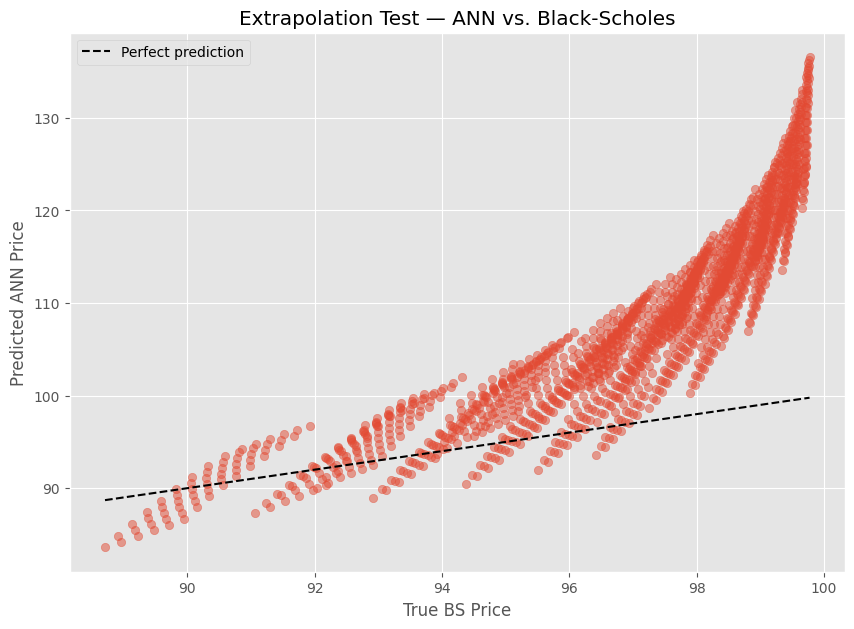

In [23]:
# Scatter plot of extrapolation performance
plt.figure(figsize=(10,7))
plt.scatter(y_extra, y_pred_extra, alpha=0.5)
plt.plot([y_extra.min(), y_extra.max()],
         [y_extra.min(), y_extra.max()],
         color='black', linestyle='--', label='Perfect prediction')
plt.xlabel("True BS Price")
plt.ylabel("Predicted ANN Price")
plt.title("Extrapolation Test — ANN vs. Black-Scholes")
plt.legend()
plt.grid(True)
plt.show()

The scatter plot comparing ANN-predicted option prices against true Black–Scholes prices in the extrapolation region (out-of-training-domain parameters). The dashed red line represents perfect prediction ($y=x$). 

The network’s performance deteriorates when extrapolating beyond the range of inputs on which it was trained. 

The strong deviation and upward curvature indicate that the neural network fails to generalize beyond the training range. In particular, it tends to overestimate option values in high-price regions and shows unstable behaviour at the tails.